In [21]:
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [22]:
cp = pd.read_csv('Taco Bell/customer_profiles.csv')
ad = pd.read_csv('Taco Bell/ad_details.csv')
ae = pd.read_csv('Taco Bell/ad_events.csv')

In [23]:
cp['gender'] = cp['gender'].replace({'M': 0, 'F': 1, 'O': 2})
cp = cp.drop('id', axis=1)
cp['ever_married'] = cp['ever_married'].replace({'Yes': 1, 'No': 0})
cp = cp.drop('home_state', axis=1)
cp = cp.drop('became_member_on (year month day)', axis=1)

scaler = StandardScaler()
scaled_array = scaler.fit_transform(cp)
df = pd.DataFrame(scaled_array)

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [ ]:
bics = []
for i in range(2,20):
    for i in range(1, 100):
        gmo = GaussianMixture(n_components=i, random_state=i)
        gm = gmo.fit(df_train)
        bic = gm.bic(df_test)
        bics.append(bic)

In [28]:
print(bics)

[29997.177414222628, 28460.21983430238, 3825.810143121181, -30976.11744115015, -34305.58409887679, -61806.56736023752, -60682.26515097651, -60735.4936739068, -60668.66821984333, -60667.635947354276, -60559.198373359424, -64616.228938804175, -65627.92372872653, -65521.57690282957, -66307.996867084, -65407.66653946011, -73188.50669029391, -73059.33851690635]


In [29]:
frame = pd.DataFrame({'Clusters': range(2, 20), "BIC": bics})
frame.head()

,Clusters,BIC
0,2,29997.177414
1,3,28460.219834
2,4,3825.810143
3,5,-30976.117441
4,6,-34305.584099


<AxesSubplot:xlabel='Clusters', ylabel='BIC'>

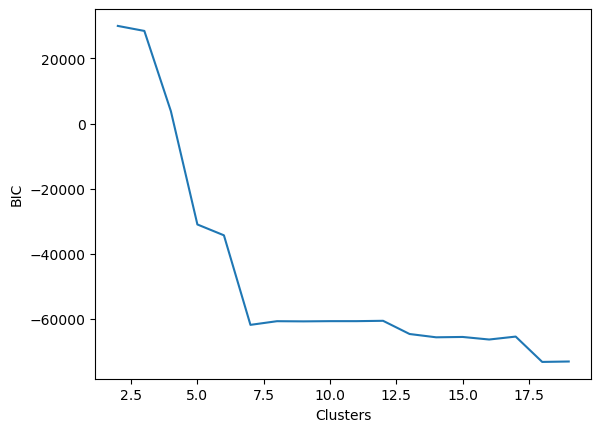

In [31]:
sns.lineplot(data=frame, x="Clusters", y="BIC")

In [33]:
min_bic_value = (frame['BIC'] - 0).abs().idxmin()
print(min_bic_value)

2


In [51]:
gm = GaussianMixture(n_components=min_bic_value+2).fit(df_train)

In [52]:
gm.means_

array([[-0.84253979, -0.14747079, -0.21010742, -1.04987642, -0.03380607],
       [ 1.13037749,  0.18779444,  0.26434296,  0.95249306,  0.00974325],
       [ 1.1231817 ,  0.16299648,  0.23395241, -1.04987642,  0.0392863 ],
       [-0.84253979, -0.1257423 , -0.20026917,  0.95249306, -0.01300997]])

In [53]:
predictions = gm.predict(df_test)

In [54]:
unscaled_array = scaler.inverse_transform(df_test)

In [55]:
df = pd.DataFrame(unscaled_array)

In [39]:
df.insert(5, "Predict", predictions, True)

In [40]:
df.head()

,0,1,2,3,4,Predict
0,1.0,52.0,79000.0,1.0,2.0,3
1,1.0,89.0,39000.0,1.0,2.0,3
2,1.0,18.0,43000.0,0.0,2.0,0
3,0.0,81.0,76000.0,1.0,2.0,1
4,0.0,42.0,84000.0,0.0,3.0,2


In [41]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        14825 non-null  int64  
 1   age           14825 non-null  int64  
 2   income        14825 non-null  float64
 3   ever_married  14825 non-null  int64  
 4   kids          14825 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 579.2 KB


<AxesSubplot:xlabel='2', ylabel='1'>

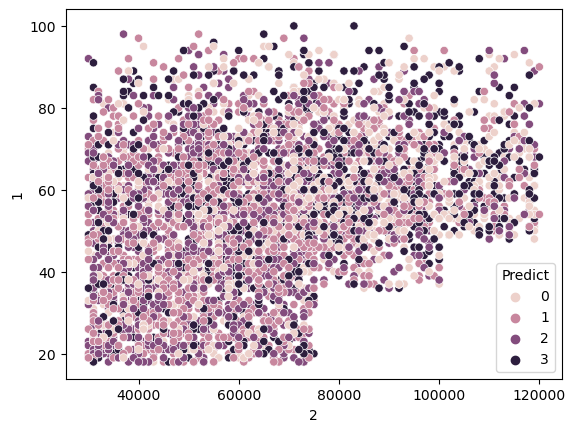

In [45]:
sns.scatterplot(data = df, y = 1, x = 2, hue = "Predict")

In [46]:
df.corr()

,0,1,2,3,4,Predict
0,1.000000,0.137257,0.209319,-0.006763,-0.015167,0.045182
1,0.137257,1.000000,0.318727,0.001415,-0.003383,0.018144
2,0.209319,0.318727,1.000000,0.001846,-0.021080,0.002021
3,-0.006763,0.001415,0.001846,1.000000,-0.007622,0.341063
4,-0.015167,-0.003383,-0.021080,-0.007622,1.000000,-0.014816
Predict,0.045182,0.018144,0.002021,0.341063,-0.014816,1.000000


In [47]:
var = scaler.inverse_transform(gm.means_)
meansDF = pd.DataFrame(var)
meansDF.head()

,0,1,2,3,4
0,1.031281e+00,57.226912,70457.795433,2.220446e-16,1.748759
1,-4.440892e-16,52.207731,61079.663858,1.000000e+00,1.671597
2,-4.440892e-16,51.830022,60867.181750,-5.551115e-16,1.640912
3,1.035056e+00,57.657978,71114.157309,1.000000e+00,1.705169


<AxesSubplot:xlabel='1', ylabel='0'>

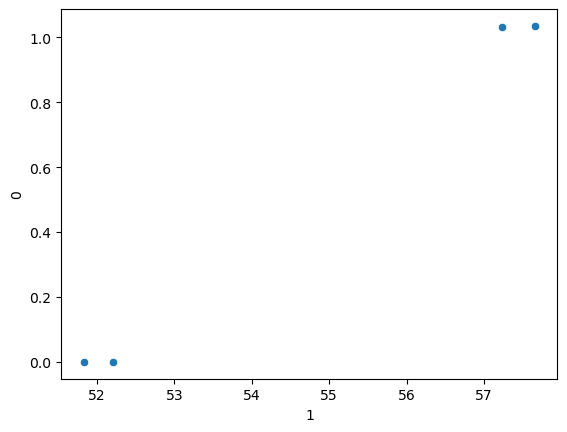

In [48]:
sns.scatterplot(data = meansDF, y = 0, x = 1)